# Titanic - Machine Learning from Disaster - agodwinp

These is my ideas around investigating the Titanic dataset using Machine Learning

First, I redefine the problem statement and attempt to critically analyse the question at hand. Then I will gain some context and understanding to the problem, by taking a closer look at the features.

### *Problem Statement*

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Survival rate = 32%.

The aim of this exercise is to use Machine Learning to correctly predict the greatest percentage of observations from the test sample. I will train a model using the 'train' dataset, listing passengers who survived and did not survive the disaster. This trained model will then be put to the test against an unseen test sample called 'test'.

As with all exercises of this nature, understanding of the event and context is key. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Throughout this analysis I will aim to extrapolate more statistically relevant information like this. Enjoy!

### Importing Packages

Now I will load the relevant packages. Pandas is used for data manipulation and to allow us to acquire our data into Pandas DataFrames. NumPy is used for mathematical programming and use of large arrays and matrices. 

Seaborn and MatPlotLib are used for visualisations.

In [1]:
# Packages for data manipulation and computation 

import pandas as pd
import numpy as np

# Packages for visualisation

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

### Acquiring the Data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
raw_train = pd.read_csv('/Users/Arun/Documents/Documents/Kaggle/Titanic - Machine Learning from Disaster/train.csv')
raw_test = pd.read_csv('/Users/Arun/Documents/Documents/Kaggle/Titanic - Machine Learning from Disaster/test.csv')

full = raw_train.append(raw_test, ignore_index=True)

train = full[:891]
test = full[891:]

print('Datasets \nfull: ', full.shape, '\ntest: ', test.shape, '\ntrain: ', train.shape)


Datasets 
full:  (1309, 12) 
test:  (418, 12) 
train:  (891, 12)


Now that the data is ready in DataFrames, let's take a look at it.

In [3]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


For further understanding, below are the descriptions for each of the features:

### Variable Descriptions

1. Age = age of passenger in years
2. Cabin = cabin number
3. Embarked = port of embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton )
4. Fare = passenger fare
5. Name = name of passenger
6. Parch = number of parents/children aboard
7. PassengerId = ID column, one unique ID per passenger
8. Pclass = ticket class
9. Sex = gender
10. Sibsp = number of siblings/spouses aboard
11. Survived = did the passenger survive? ( 1 = survived, 0 = did not survive )
12. Ticket = ticket number

#### *Variable Notes*

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

### Analysing the features

With this context, let's understand the representations of these columns. This can help to guide us as we move forward.

In [4]:
print(full.columns.values)

['Age' 'Cabin' 'Embarked' 'Fare' 'Name' 'Parch' 'PassengerId' 'Pclass'
 'Sex' 'SibSp' 'Survived' 'Ticket']


It is important to understand which features have missing values, so that we can handle these missing values or decide whether to exclude these features.

Age            177
Cabin          687
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64


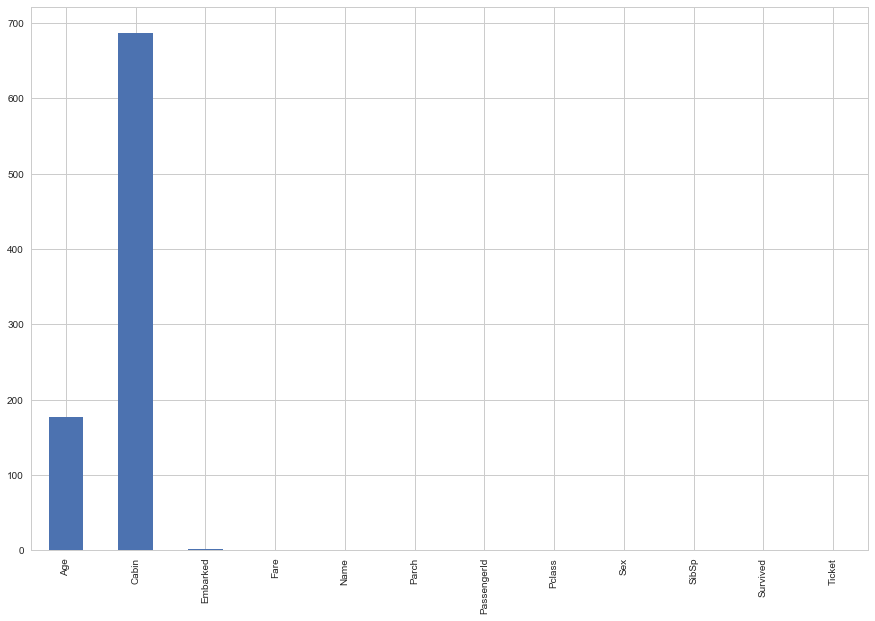

In [5]:
plt.subplots(figsize =(15, 10))
train.isnull().sum().plot(kind='bar')
print(train.isnull().sum())

From this, we can see that Cabin and Age have a significant number of missing values. The decision now must be made to replace these with a value, or to exclude this feature completely.

To continue our analysis, let's look at the datatypes for each of the features.

In [6]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 12 columns):
Age            332 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Fare           417 non-null float64
Name           418 non-null object
Parch          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 n

We can see that for the training sample, we have 3 floating numbers, 4 integers and 5 categorical variables. The only difference for the test sample is that the survived column is missing, which is intended.

Now let's take a look at some descriptive attributes of the features.

We can see that:

- Age: 715 complete entries leabing 177 missing values, the mean age was 29 and the max was 80. Looking at the lower quartile, median and upper quartile, we can see that this feature is positively skewed, with more weighting towards the lower ages.
- Cabin: There was 147 unique cabins in the dataset but a lot of missing values. The cabin which appeared the most number of times was G6.
- Embarked: There were 3 categories for this variable, Southampton being the most popular appearing 644 times.
- Fare: No missing values, the mean was £32. This feature is very positively skewed with a max value of 512, perhaps this was for the very high class tickets, or maybe this is an outlier.
- Parch: This tells us that some people travelled with no parents or children. In fact this was true for a very large % of the passengers, as we can see the UQ = 0. However, the max for this feature is 6, indicating a large family.
- PassengerId: This doesn't tell us much as this is a unique ID for each passenger
- Pclass: This is a categorical variable and looking at the mean, this tells us that most people would have travelled 2nd or 3rd class, this is justified by looking at the LQ, Median and UQ. The median is 3, indicating that over half of the passengers travelled 3rd class.
- Sibsp: This, alongside Parch tells us that some people travelled alone, but specifically for Sibsp, this tell us that most people travelled without any siblings or spouses, only a small % of people travelled with one, and the max value here was 8, perhaps indicating a large family or brothers ofr sisters.
- Survived: This is our categorical target variable, all this is useful to show is that there are 2 categories, survived or didnt survive.
- Ticket: Interestingly there are less unique tickets than passengers, and one ticket appears 7 times, this may be due to a family buing a ticket for 7 people perhaps, or fraud.

In [7]:
train.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,714.000000,204,889,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891.000000,891
unique,NaN,147,3,NaN,891,NaN,NaN,NaN,2,NaN,NaN,681
top,NaN,C23 C25 C27,S,NaN,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,4,644,NaN,1,NaN,NaN,NaN,577,NaN,NaN,7
mean,29.699118,NaN,NaN,32.204208,NaN,0.381594,446.000000,2.308642,NaN,0.523008,0.383838,NaN
std,14.526497,NaN,NaN,49.693429,NaN,0.806057,257.353842,0.836071,NaN,1.102743,0.486592,NaN
min,0.420000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,20.125000,NaN,NaN,7.910400,NaN,0.000000,223.500000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,446.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,38.000000,NaN,NaN,31.000000,NaN,0.000000,668.500000,3.000000,NaN,1.000000,1.000000,NaN


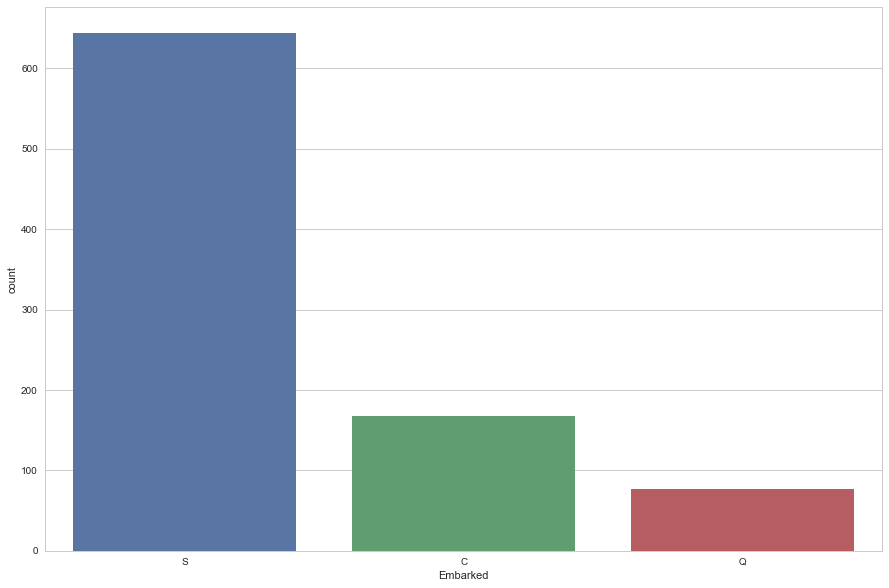

In [8]:
plt.subplots(figsize =(15, 10))
sns.countplot(x="Embarked", data=train);

This chart shows us how many people embarked from the 3 different ports. The most people embarked from Southampton, then Cherbourg and finally Queenstown. This may be an interesting feature to make dummy variables from.

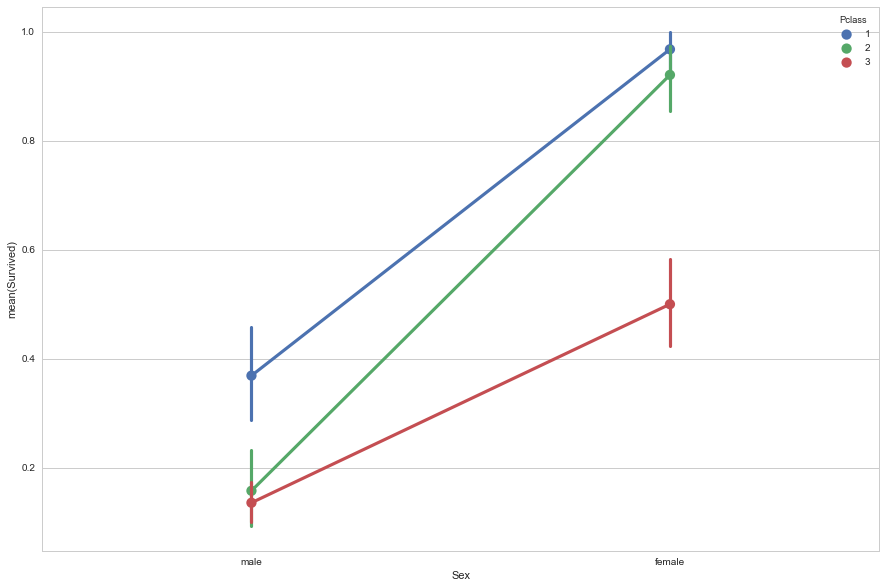

In [9]:
plt.subplots(figsize =(15, 10))
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=train);

This shows that the average number of survivors as we toggle from 'Male' to 'Female' increases, which may seem obvious through intuition. What's interesting is that there is the steepest gradient or ratio from 'Males' to 'Females' in second class, perhaps because there were more passengers in this class, in comparison to first class.

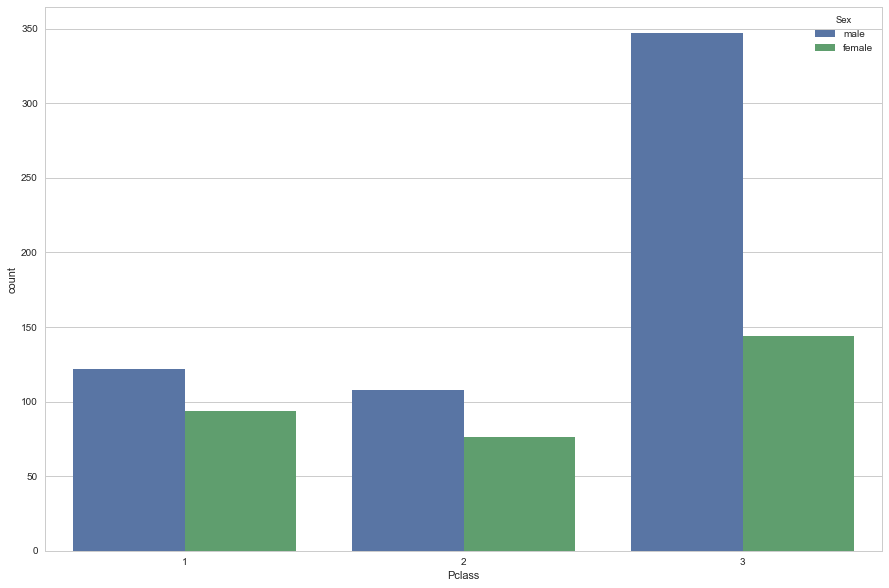

In [53]:
plt.subplots(figsize =(15, 10))
sns.countplot(x="Pclass", hue='Sex', data=train);

As we can see from this graph, the number of passengers in second class is actually less than first first class, dismissing my assumption above. This is interesting because the largest ratio of females to amles saved came from second class. The reason for this, can be investigated through this analysis.

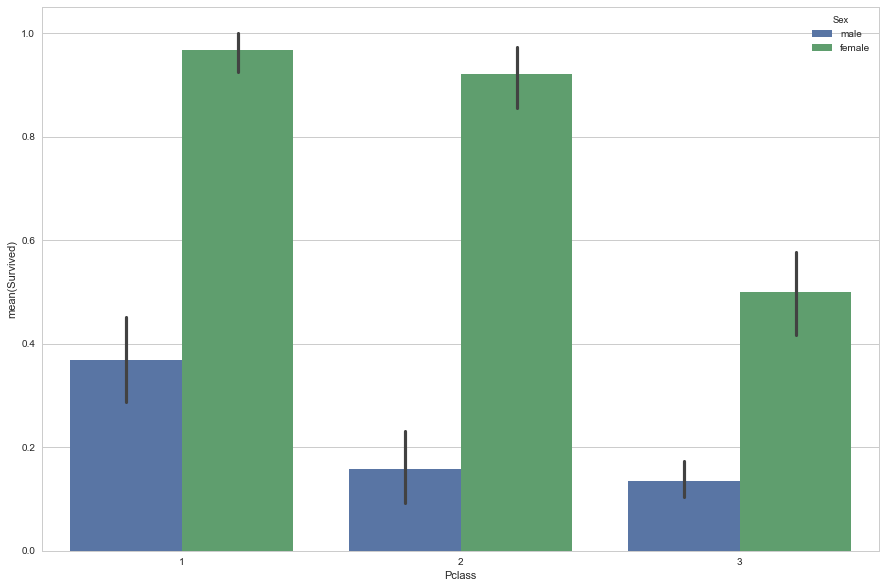

In [10]:
plt.subplots(figsize =(15, 10))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train);

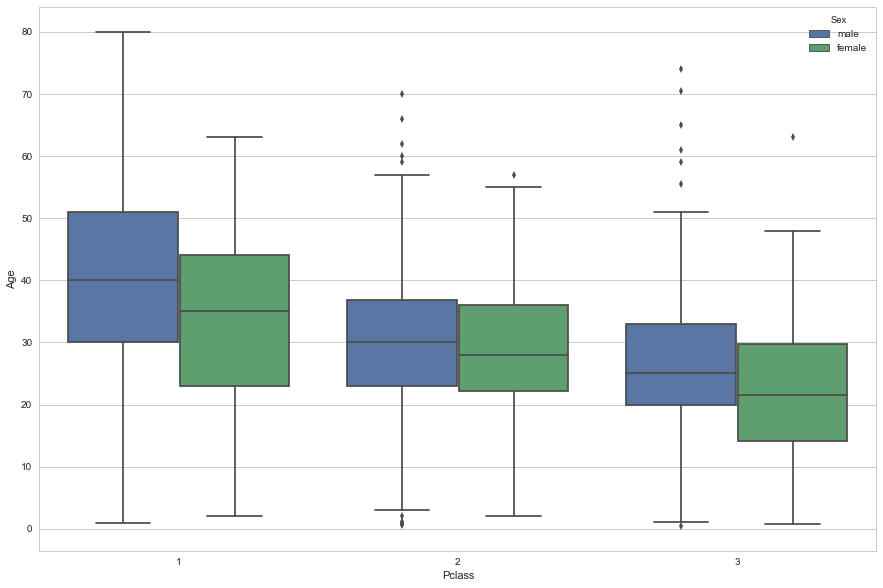

In [21]:
plt.subplots(figsize =(15, 10))
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=train);

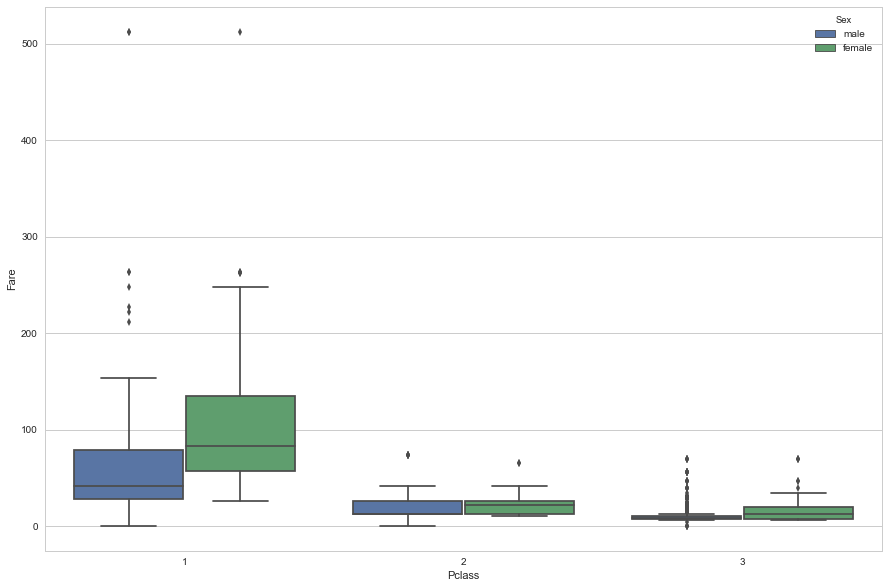

In [22]:
plt.subplots(figsize =(15, 10))
sns.boxplot(x="Pclass", y="Fare", hue="Sex", data=train);

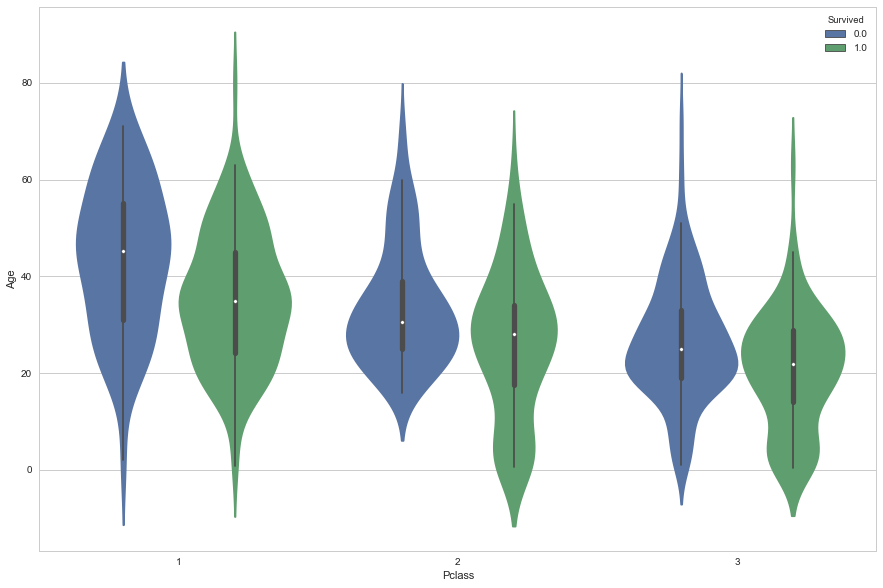

In [18]:
plt.subplots(figsize =(15, 10))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train);

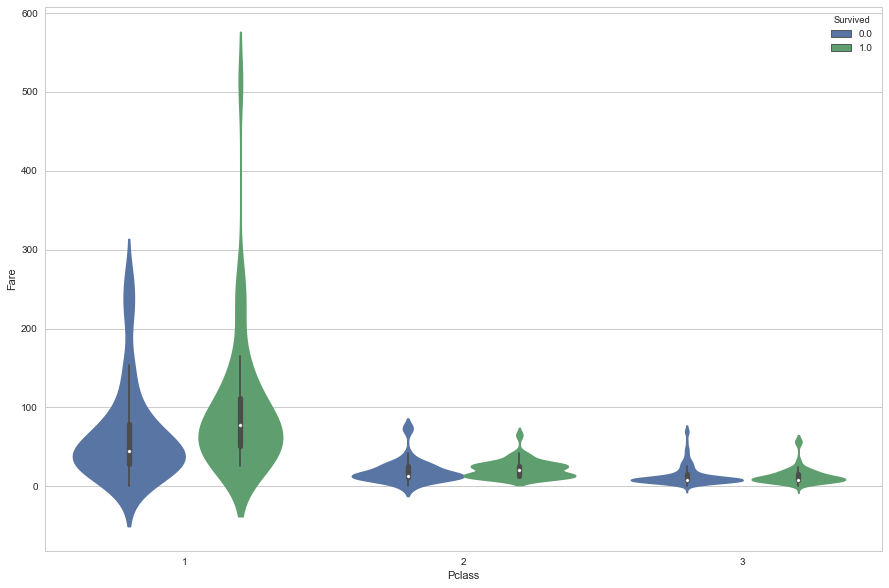

In [20]:
plt.subplots(figsize =(15, 10))
sns.violinplot(x="Pclass", y="Fare", hue="Survived", data=train);

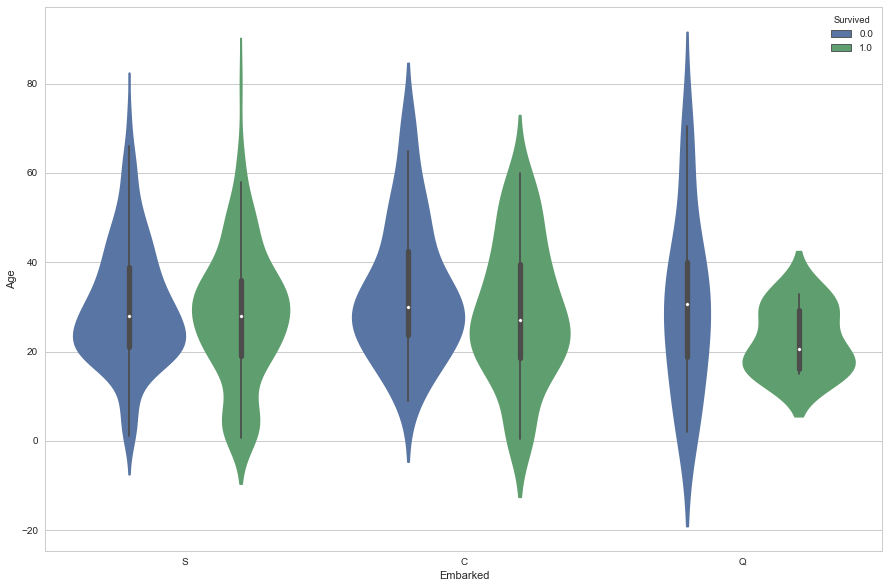

In [41]:
plt.subplots(figsize =(15, 10))
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train);

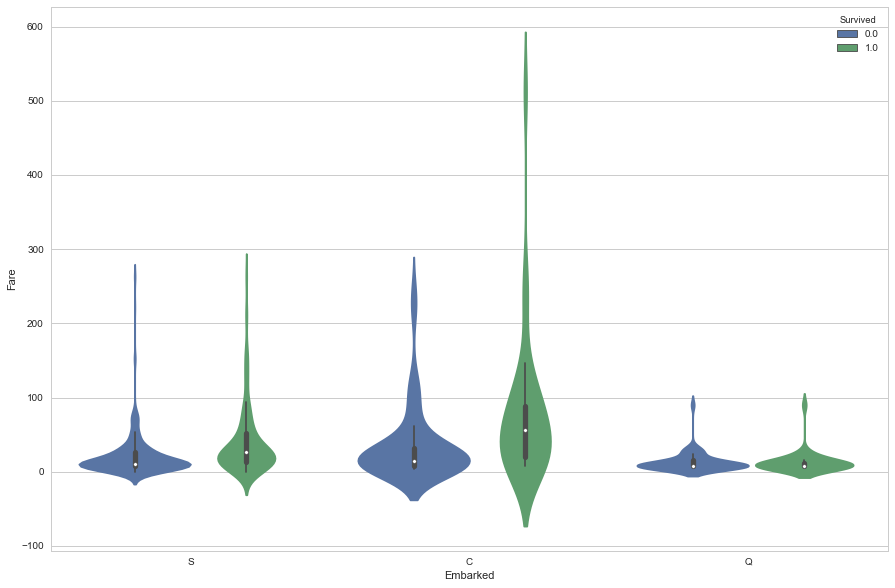

In [42]:
plt.subplots(figsize =(15, 10))
sns.violinplot(x="Embarked", y="Fare", hue="Survived", data=train);

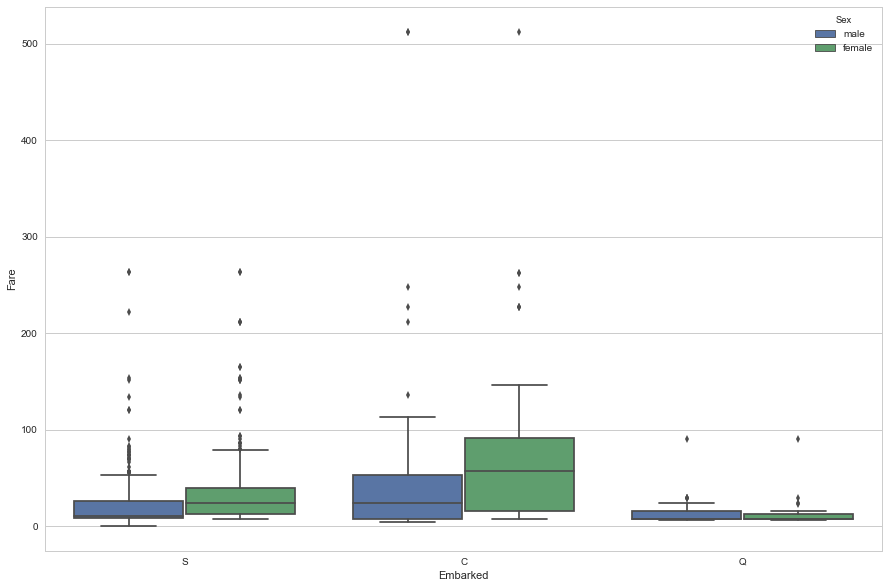

In [43]:
plt.subplots(figsize =(15, 10))
sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=train);

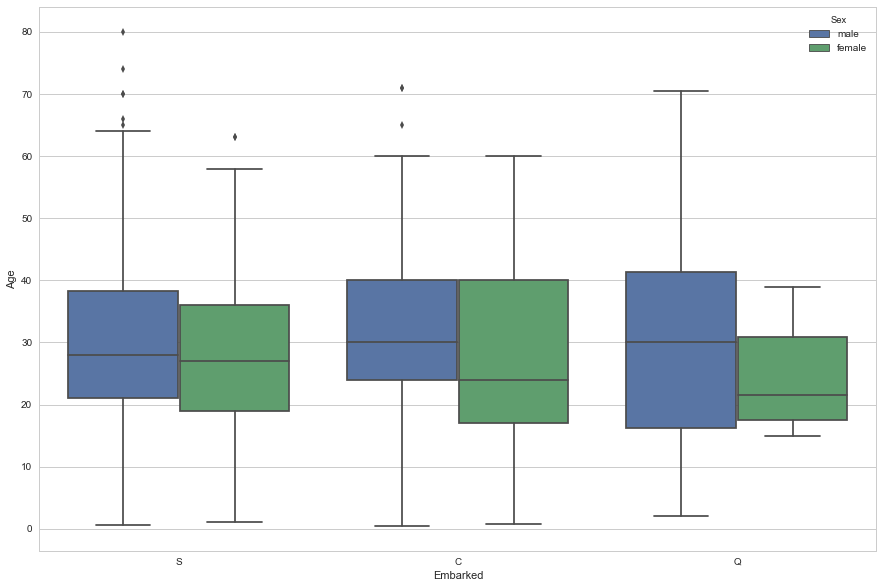

In [44]:
plt.subplots(figsize =(15, 10))
sns.boxplot(x="Embarked", y="Age", hue="Sex", data=train);

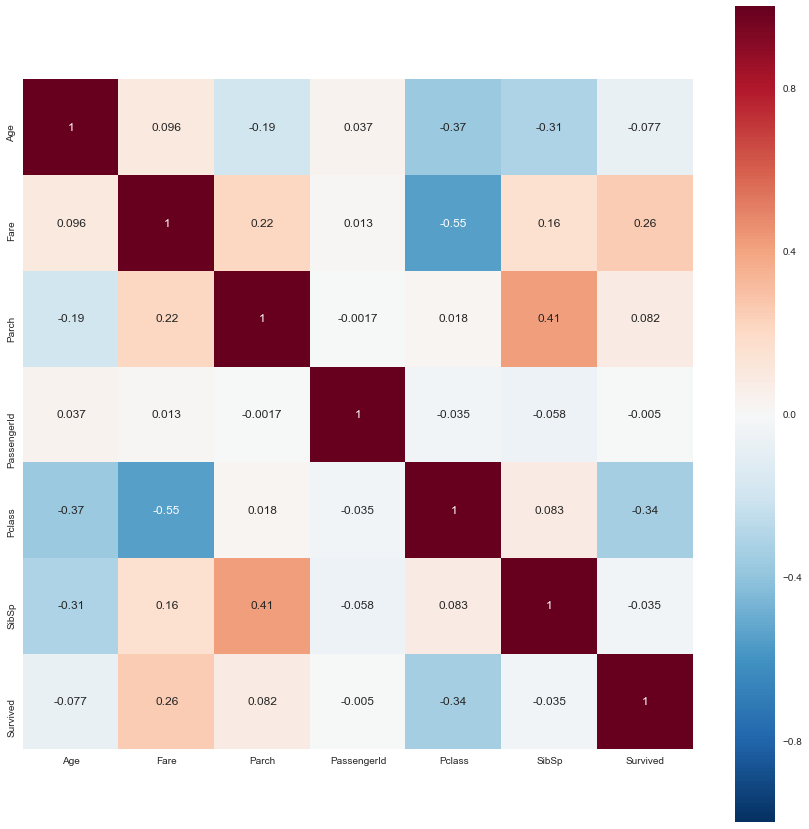

In [28]:
corr = train.corr()
plt.subplots(figsize =(15, 15))
corr_plot = sns.heatmap(corr, annot=True, square = True

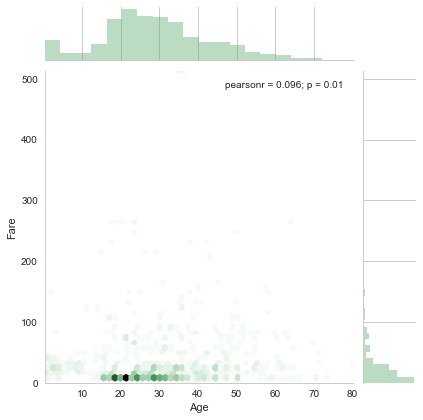

In [36]:
sns.jointplot(x=train['Age'], y=train['Fare'], kind="hex", color="g");

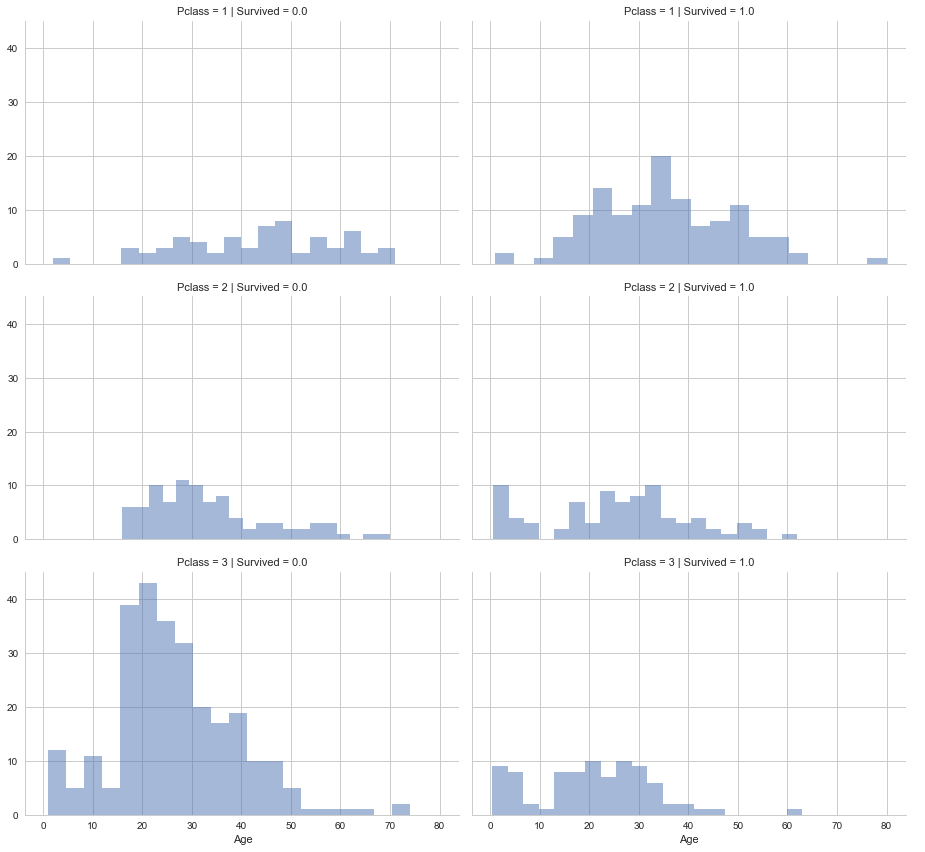

In [51]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();